# The Sparks Foundation : Data Science and Business Analytics Internship

#### **Task 2:** Prediction Using Unsupervised Machine Learning [Level: Beginner]
- **Problem Statement:** For the 'iris' dataset, predict the optimum number of clusters and represent it visually

#### **Author:** Rohit Rannavre

In [1]:
# importing dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# loading the 'iris' dataset
df = pd.read_csv('/content/dataset_2.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking the shape (number of rows and columns) of the dataset
df.shape

(150, 5)

In [4]:
# checking datatypes, dataset size, missing values of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# getting a statistical summary of the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# creating X to place into clusters
X = df.iloc[:, [0, 1, 2, 3]].values

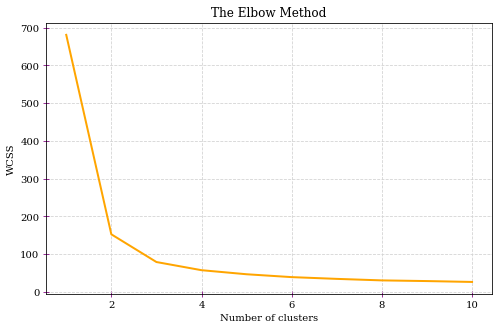

In [7]:
# defining and plotting the Elbow method

# function to calculate WCSS
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 90)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the Elbow method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, color="orange", linewidth=2, zorder=2)
plt.xlabel('Number of clusters', family='serif')
plt.ylabel('WCSS', family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.title('The Elbow Method', fontsize=12, family='serif', size=12)
plt.show()

In [8]:
# training a K-Means Clustering model using 'k=3' as rendered by the above Elbow plot
kmean = KMeans(n_clusters=3, init = 'k-means++', random_state=90)
kmean.fit(X)

KMeans(n_clusters=3, random_state=90)

In [9]:
# checking the size of each cluster as rendered by the model
pd.Series(kmean.labels_).value_counts()

0    62
1    50
2    38
dtype: int64

In [10]:
# creating a new column for cluster labels
df['clusters'] = kmean.labels_

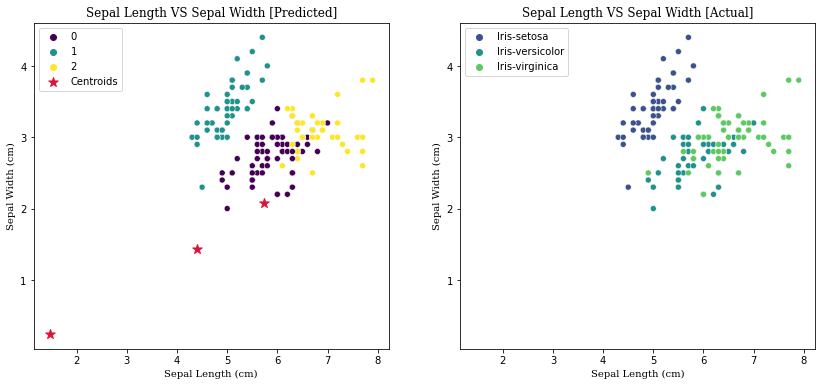

In [11]:
# sepal length vs sepal width comparison
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# predicted values comparison
sns.scatterplot(ax=ax1, data=df, x='SepalLengthCm', y='SepalWidthCm', hue='clusters', palette='viridis')
ax1.scatter(x=kmean.cluster_centers_[:, 2], y=kmean.cluster_centers_[:, 3], s=100, c='crimson', marker='*', label='Centroids')
ax1.set_title('Sepal Length VS Sepal Width [Predicted]', family='serif', size=12)
ax1.set_xlabel('Sepal Length (cm)', family='serif')
ax1.set_ylabel('Sepal Width (cm)', family='serif')
ax1.legend()

# actual values comparison
sns.scatterplot(ax=ax2, data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='viridis')
ax2.scatter(x=kmean.cluster_centers_[:, 2], y=kmean.cluster_centers_[:, 3], s=0, c='yellow', marker='*')
ax2.set_title('Sepal Length VS Sepal Width [Actual]', family='serif', size=12)
ax2.set_xlabel('Sepal Length (cm)', family='serif')
ax2.set_ylabel('Sepal Width (cm)', family='serif')
ax2.legend(loc=2);

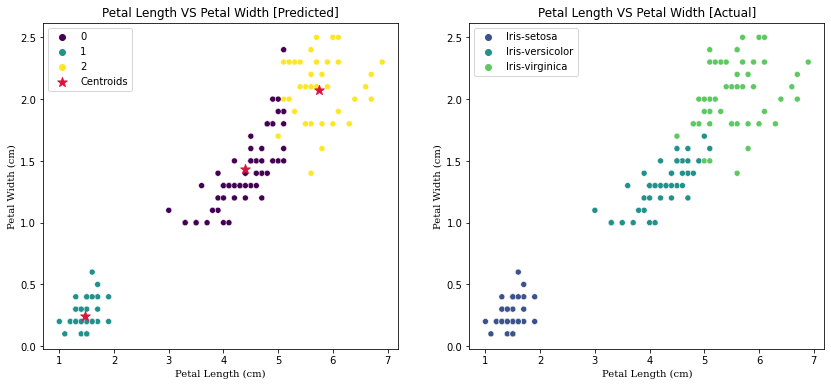

In [12]:
# petal length vs petal width comparison
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# predicted values comparison
sns.scatterplot(ax=ax1, data=df, x='PetalLengthCm', y='PetalWidthCm', hue='clusters', palette='viridis')
ax1.scatter(x=kmean.cluster_centers_[:, 2], y=kmean.cluster_centers_[:, 3], s=100, c='crimson', marker='*', label='Centroids')
ax1.set_title('Petal Length VS Petal Width [Predicted]')
ax1.set_xlabel('Petal Length (cm)', family='serif')
ax1.set_ylabel('Petal Width (cm)', family='serif')
ax1.legend()

# actual values comparison
sns.scatterplot(ax=ax2, data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='viridis')
ax2.scatter(x=kmean.cluster_centers_[:, 2], y=kmean.cluster_centers_[:, 3], s=0, c='yellow', marker='*')
ax2.set_title('Petal Length VS Petal Width [Actual]')
ax2.set_xlabel('Petal Length (cm)', family='serif')
ax2.set_ylabel('Petal Width (cm)', family='serif')
ax2.legend();

## **Conclusion**: *The optimum number of clusters for the Iris dataset will be 3.*